# Create a plot of the spectrum of a CMFGen obs_fin file

There is also an OBSFLUX file, but this is not the final file. That file has a similar format, so one needs to be careful

In [1]:
import os
os.getcwd()

'/Users/long/Projects/Python/release-models/Details/cmfgen/cmfgen'

In [2]:
import matplotlib.pyplot as plt


In [3]:
from astropy.table import Table
from astropy.io import ascii
import numpy as np

In [4]:
def obsum2table(filename='a3/OBSFLUX',outroot=''):
    '''
    Read the spectrum file from CMFGen and rewrite it as an astropy table
    '''
    
    f=open(filename)
    lines=f.readlines()
    freq=[]
    flux=[]
    nfreq=0
    nflux=0
    itype='None'
    for line in lines:
        
        if line.count('Continuum Frequencies'):
            print('Caught em',line)
            itype='Freq'
        elif line.count('Observed intensity (Janskys)'):
            print('hello',line)
            itype='Flux'
        elif line.count('Luminosity'):
            break
        elif itype=='Freq': 
            words=line.split()
            for word in words:
                freq.append(eval(word))
            nfreq+=len(words)
        elif itype=='Flux': 
            words=line.split()
            for word in words:
                flux.append(eval(word))
            nflux+=len(words)
                
    print(len(freq),len(flux))
    freq=np.array(freq)*1e15
    wave=2.997e10/freq*1e8
    flux=np.array(flux)*1e-23*freq
    flux=flux*100. # To move to 100 pc from a kpc
    x=Table([freq,wave,flux],names=['Freq','Wave','nuFnu'])

    if outroot=='':
        outroot='test'

    outname='%s.spec.txt' % outroot

    x.write(outname, format='ascii.fixed_width_two_line',overwrite=True)
    return outname
            
    
xname=obsum2table(filename='a3/obs_fin',outroot='a3')    


Caught em  Continuum Frequencies ( 233565 )

hello  Observed intensity (Janskys)

233565 233565


In [5]:
x=ascii.read(xname)
x.info()

<Table length=233565>
 name  dtype 
----- -------
 Freq float64
 Wave float64
nuFnu float64


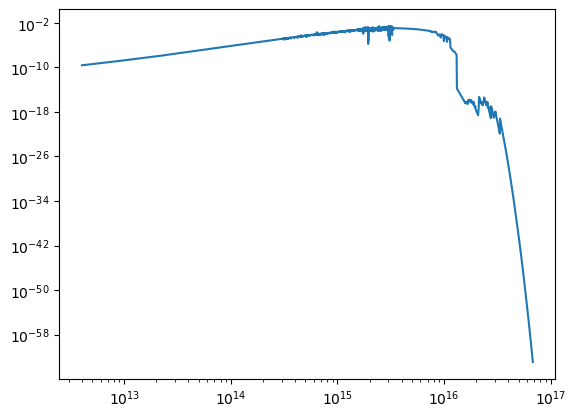

In [6]:
plt.loglog(x['Freq'],x['nuFnu'])

Text(0, 0.5, '$\\nu F_{\\nu}$')

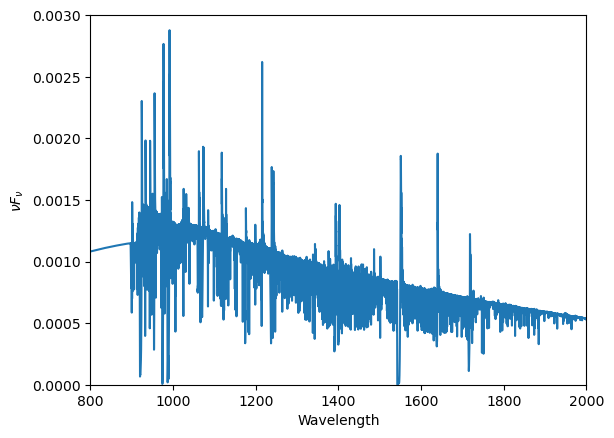

In [7]:
plt.plot(x['Wave'],x['nuFnu'])
plt.xlim(800,2000)
# plt.xlim(1500,1600)
plt.ylim(0,0.003)
plt.xlabel('Wavelength')
plt.ylabel(r'$\nu F_{\nu}$')